<a href="https://colab.research.google.com/github/notgian/csmodel-gr4-backup-repo/blob/main/CSMODEL_GRP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Description**





## Overview




The dataset, titled **“Estimation of Obesity Levels Based on Eating Habits and Physical Condition”**, originates from research conducted by *Yağın and Gülü (2022)* and is available on [Semantic Scholar](https://www.semanticscholar.org/paper/Estimation-of-Obesity-Levels-with-a-Trained-Neural-Ya%C4%9F%C4%B1n-G%C3%BCl%C3%BC/2c1eab51db154493d225c8b86ba885bbaf147a2c).

It aims to estimate **obesity levels** in individuals from **Mexico, Peru, and Colombia**, based on their **eating habits, physical activity, and lifestyle patterns**. The dataset is widely used for classification and predictive modeling in health and nutrition studies.


## Data Collection Process




The dataset contains **2,111 records** and **17 attributes**.  
- **23%** of the data was **collected directly from users** through an online survey platform. Participants provided information about their demographics, physical condition, and eating habits.  
- **77%** of the data was **synthetically generated** using the **SMOTE (Synthetic Minority Oversampling Technique)** in the **Weka** tool to balance the class distribution across obesity levels.

This hybrid data collection process ensures diversity and balance but also implies certain **limitations**. The synthetic portion, while helping to prevent bias due to underrepresentation, may slightly reduce real-world variability. Therefore, conclusions drawn from this dataset should be viewed as **predictive approximations**, not absolute population-level insights.


## Dataset Structure




- **Number of Observations (Rows):** 2,111  
- **Number of Variables (Columns):** 17  
- **Target Variable:** `NObesity` (Obesity Level)  
- **File Type:** CSV  

Each **row** represents one individual’s health and lifestyle record,  
while each **column** corresponds to a specific attribute related to diet, physical activity, or health status.

The **target variable** (`NObesity`) is a categorical label that classifies each record into one of the following obesity levels:
- *Insufficient Weight*  
- *Normal Weight*  
- *Overweight Level I*  
- *Overweight Level II*  
- *Obesity Type I*  
- *Obesity Type II*  
- *Obesity Type III*

## Some Necessary Imports
We first import the necessary packages and the dataset itself. For portability purposes, the dataset will be downloaded via kagglehub.

In [195]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [196]:
# Importing the dataset via kagglehub
import kagglehub
import os

csv_path = kagglehub.dataset_download("fatemehmehrparvar/obesity-levels")
csv_file = os.listdir(csv_path)[0] # The only file downloaded is the obesity csv
csv_filepath = os.path.join(csv_path, csv_file)

obesity_df = pd.read_csv(csv_filepath)

Using Colab cache for faster access to the 'obesity-levels' dataset.


## Describing the Dataset
Before performing any sort of analyses, it is important to first acquanint ourselves with the different properties of the data and the dataset.

### About the Dataset

The dataset authored by Fatemeh Mehrparvar and posted on and obtained via Kaggle. It contains data on inididuals from Mexico, Peru, and Colombia. Around 77% of the data is synthetic, generated with the Weka toll and the SMOTE filter, while the other 23% was collected directly through an unspecified web platform

### About the data
We then view the properties of the dataframe to learn more about the data itself.

In [197]:
obesity_df.shape

(2111, 17)

In [198]:
obesity_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

Given the shape of the dataframe, the dataset contains 2,111 rows and 17 columns. Next, we view the head of the data to view the different columns.

In [199]:
obesity_df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



**1. Age**
  - The person's age.

**2. Gender**
- The person's gender.

**3. Height**
- The person's height.

**4. Weight**
- The person's weight.

**5. CALC**
- Categorical, " How often do you drink alcohol? "

**6. FAVC**
- Binary, " Do you eat high caloric food frequently? "

**7. FCVC**
- Integer, " Do you usually eat vegetables in your meals? "

**8. NCP**
- Continuous, " How many main meals do you have daily? "

**9. SCC**
- Binary, " Do you monitor the calories you eat daily? "

**10. SMOKE**
- Binary, " Do you smoke? "

**11. CH2O**
- Continuous, " How much water do you drink daily? "

**12. family_history_with_overweight**
- Binary, " Has a family member suffered or suffers from overweight? "

**13. FAF**
- Continuous, " How often do you have physical activity? "

**14. TUE**
- Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

**15. CAEC**
- Categorical, " Do you eat any food between meals? "

**16. MTRANS**
- Categorical, " Which transportation do you usually use? "

**17. NObeyesdad**
- Categorical, "Obesity level"


# **Data Cleaning**

In [200]:
try:
    df = obesity_df.copy()
    print("Using existing dataframe: obesity_df")
except NameError:
    raise RuntimeError("Dataset not found. Please run the import cells first.")

Using existing dataframe: obesity_df


A copy of `obesity_df` will be used instead to preserve the original data. We check what parts of the data may require cleaning by checking if there are any duplicates or null values.

In [201]:
df.duplicated().sum()

np.int64(24)

In [202]:
# Checking for counts of null data in each column
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


The code above shows that no duplicate entries nor null values are present in the dataframe.

In [203]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [204]:
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")


Gender: ['Female' 'Male']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
FAVC: ['no' 'yes']
SCC: ['no' 'yes']
SMOKE: ['no' 'yes']
family_history_with_overweight: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


### Clean Column Names

In [205]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[^a-z0-9]+', '_', regex=True)
      .str.strip('_')
)

df.columns

Index(['age', 'gender', 'height', 'weight', 'calc', 'favc', 'fcvc', 'ncp',
       'scc', 'smoke', 'ch2o', 'family_history_with_overweight', 'faf', 'tue',
       'caec', 'mtrans', 'nobeyesdad'],
      dtype='object')

### Fix Data Types

In [206]:
num_cols = ['age','height','weight','fcvc','ncp','ch2o','faf','tue']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

cat_cols = [c for c in df.columns if c not in num_cols]
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip()


### Normalize Text Categories

In [207]:
yn_map = {'yes':'yes','no':'no','Yes':'yes','No':'no','YES':'yes','NO':'no'}
level_map = {'Sometimes':'Sometimes','sometimes':'Sometimes',
             'Frequently':'Frequently','frequently':'Frequently',
             'Always':'Always','always':'Always','no':'no','No':'no'}
transport_map = {'Public_Transportation':'Public_Transportation','Automobile':'Automobile',
                 'Walking':'Walking','Bike':'Bike','Bicycle':'Bike'}

for c in ['favc','scc','smoke','family_history_with_overweight']:
    df[c] = df[c].map(yn_map).fillna(df[c])

for c in ['caec','calc']:
    df[c] = df[c].map(level_map).fillna(df[c])

df['mtrans'] = df['mtrans'].map(transport_map).fillna(df['mtrans'])
df['gender'] = df['gender'].str.capitalize().replace({'F':'Female','M':'Male'})


### Clean Target Column


In [208]:
target_order = [
    'Insufficient_Weight','Normal_Weight',
    'Overweight_Level_I','Overweight_Level_II',
    'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
]

df['nobeyesdad'] = (
    df['nobeyesdad']
      .str.replace(' ', '_')
      .astype('category')
      .cat.set_categories(target_order, ordered=True)
)


### Remove Duplicates & Handle Outliers



In [209]:
df = df.drop_duplicates()

df.loc[(df['height'] < 1.2) | (df['height'] > 2.2), 'height'] = np.nan
df.loc[(df['weight'] < 30) | (df['weight'] > 250), 'weight'] = np.nan
df.loc[(df['age'] < 10) | (df['age'] > 90), 'age'] = np.nan

def iqr_clip(s, k=1.5):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - k*iqr, q3 + k*iqr
    return s.clip(lower=lo, upper=hi)

for c in num_cols:
    df[c] = iqr_clip(df[c])


### Handle Missing Values

In [210]:
for c in df.columns:
    if df[c].dtype.kind in 'biufc':
        df[c] = df[c].fillna(df[c].median())
    else:
        df[c] = df[c].replace({'nan': np.nan})
        df[c] = df[c].fillna(df[c].mode(dropna=True).iloc[0])


### Feature Engineering

Using weight and height, we compute the BMI of each individual entry.

In [211]:
df['bmi'] = df['weight'] / (df['height'] ** 2)

def bmi_bucket(x):
    if pd.isna(x): return np.nan
    if x < 18.5: return 'Underweight'
    if x < 25: return 'Normal'
    if x < 30: return 'Overweight'
    return 'Obese'

df['bmi_category'] = pd.Categorical(
    df['bmi'].apply(bmi_bucket),
    categories=['Underweight','Normal','Overweight','Obese'],
    ordered=True
)

for c in ['favc','scc','smoke','family_history_with_overweight']:
    df[c + '_bin'] = df[c].map({'no':0,'yes':1}).astype('Int64')

obesity_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['nobeyesdad_encoded'] = df['nobeyesdad'].map(obesity_map)


### Save and Verify Cleaned Data

In [212]:
out_path = Path.cwd() / "obesity_levels_clean.csv"
df.to_csv(out_path, index=False)

print("Rows, Cols:", df.shape)
print("Missing values after cleaning:\n", df.isna().sum().sum())
print(f"✅ Cleaned dataset saved to: {out_path.resolve()}")


Rows, Cols: (2087, 24)
Missing values after cleaning:
 0
✅ Cleaned dataset saved to: /content/obesity_levels_clean.csv


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   age                                 2087 non-null   float64 
 1   gender                              2087 non-null   object  
 2   height                              2087 non-null   float64 
 3   weight                              2087 non-null   float64 
 4   calc                                2087 non-null   object  
 5   favc                                2087 non-null   object  
 6   fcvc                                2087 non-null   float64 
 7   ncp                                 2087 non-null   float64 
 8   scc                                 2087 non-null   object  
 9   smoke                               2087 non-null   object  
 10  ch2o                                2087 non-null   float64 
 11  family_history_with_overweight     

# **Exploratory Data Analysis**

##**EDA Q1: What Defines and Differentiates the Obesity Levels in the Dataset?**

In this section, we examined the distribution and key numerical characteristics of each obesity category (nobeyesdad).

Our goal was to understand how the dataset defines each obesity level and to observe how key physical measurements such as BMI and weight vary across categories.

### Procedure

1. Data Preparation

*  The target variable nobeyesdad classifies individuals into seven ordered categories:
Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.
*   We used the continuous variables bmi (Body Mass Index) and weight as the main indicators to describe each obesity level.

2. Descriptive Statistics

*   We grouped the dataset by nobeyesdad and computed the minimum, maximum, mean, and median for both BMI and weight.
*   This allows us to determine the range of values that define each obesity level.
3. Distribution Visualization

*  We visualized the count of individuals per obesity category to understand how observations are distributed.
*   Additionally, a boxplot of BMI across obesity levels shows how body mass increases progressively through the categories.
---

### Distribution of Obesity Levels

In [214]:
obesity_counts = df['nobeyesdad'].value_counts().sort_index()
display(obesity_counts)

,count
nobeyesdad,
Insufficient_Weight,267
Normal_Weight,282
Overweight_Level_I,276
Overweight_Level_II,290
Obesity_Type_I,351
Obesity_Type_II,297
Obesity_Type_III,324


### BMI and Weight Summary by Obesity Level

In [215]:
obesity_ranges = (
    df.groupby('nobeyesdad', observed=True)[['bmi', 'weight']]
      .agg(['min', 'max', 'mean', 'median'])
      .round(2)
)
display(obesity_ranges)

bmi                      weight                        
                       min    max   mean median    min     max    mean  median
nobeyesdad                                                                    
Insufficient_Weight  13.00  19.08  17.39  17.53   39.0   65.00   50.01   50.00
Normal_Weight        18.49  24.91  22.01  22.12   42.3   87.00   62.16   61.00
Overweight_Level_I   22.83  28.77  25.96  25.95   53.0   91.00   74.48   75.00
Overweight_Level_II  25.71  30.36  28.22  28.15   60.0  102.00   82.09   82.00
Obesity_Type_I       29.91  35.17  32.26  32.20   75.0  125.00   92.87   90.74
Obesity_Type_II      34.05  39.79  36.72  36.42   93.0  130.00  115.31  117.79
Obesity_Type_III     36.77  50.81  42.27  41.94  102.0  171.04  120.94  112.05

### Visualization: Count of Individuals per Obesity Level

/tmp/ipython-input-3012575218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='nobeyesdad', palette='crest', order=df['nobeyesdad'].cat.categories)


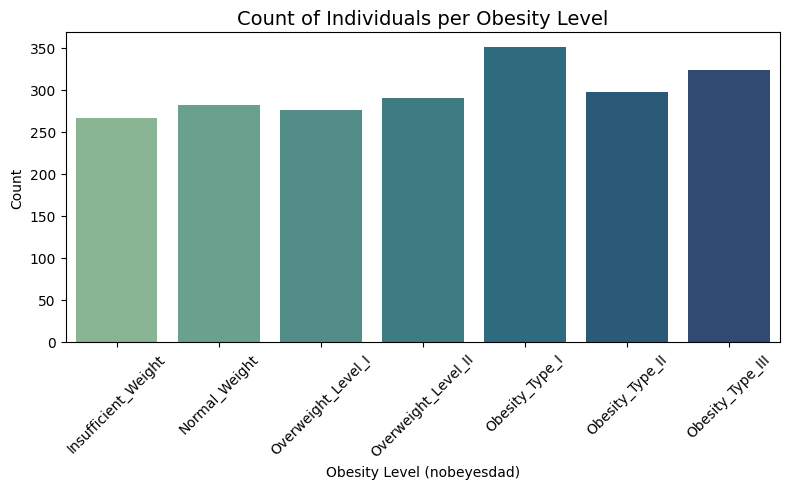

In [216]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='nobeyesdad', palette='crest', order=df['nobeyesdad'].cat.categories)
plt.title("Count of Individuals per Obesity Level", fontsize=14)
plt.xlabel("Obesity Level (nobeyesdad)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization: Distribution of BMI Across Obesity Levels

/tmp/ipython-input-1794809144.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='nobeyesdad', y='bmi', palette='crest')


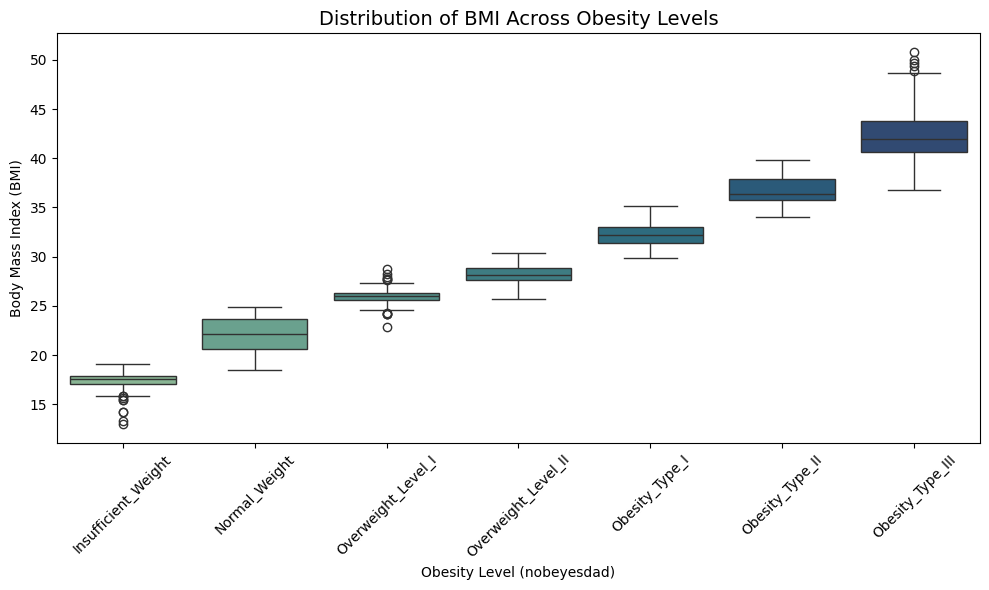

In [217]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='nobeyesdad', y='bmi', palette='crest')
plt.title("Distribution of BMI Across Obesity Levels", fontsize=14)
plt.xlabel("Obesity Level (nobeyesdad)")
plt.ylabel("Body Mass Index (BMI)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Findings and Interpretation



From the summary table and visualizations, we observed that:

*   BMI and weight increase steadily as we move from Insufficient Weight to Obesity Type III.

*   The mean and median values for both BMI and weight show a clear upward trend, reflecting a consistent central tendency pattern across obesity levels.

*   Individuals in the Normal Weight category typically have BMI values between 18.5–24.9, consistent with standard health definitions.

*   The Overweight and Obesity categories show progressively higher mean BMI values, confirming that the dataset’s classifications align with BMI-based health standards.

*   The range (min to max) widens in higher obesity levels, suggesting greater variability in body composition among individuals with obesity.

*   The count plot shows that most individuals fall within Normal Weight and Overweight Level I, while extreme obesity categories have fewer observations.

These findings indicate that each obesity category is quantitatively distinct, defined by increasing central tendency (mean and median) and range in BMI and weight.


### Summary







This analysis clarifies how the **target variable** (nobeyesdad) is structured and what numerical values define each obesity level.
By including **measures of central tendency and range**, we identified the typical (average) BMI and weight values per category and how they progress across the obesity spectrum.

This provides a **clear quantitative foundation** for interpreting later analyses — such as how age, physical activity, or calorie monitoring relate to these obesity categories.

In conclusion, **EDA Q1** confirms that the dataset’s obesity levels are systematically defined by BMI and weight, with higher categories showing higher central tendency and wider ranges.

#### Procedure

**Data Preparation**
  - We used the variable `age`, which represents the age of each individual, and `nobeyesdad`, which classifies individuals into seven weight categories — from Insufficient Weight to Obesity Type III. The goal was to analyze how age distribution varies across different obesity levels

##**EDA Q2: How does physical activity relate to obesity level**
In this part of our analysis, we explored the relationship between **physical activity frequency** (`FAF`) and **obesity level** (`nobeyesdad`).  

Our goal was to see whether individuals who engage in more frequent physical activity tend to have lower levels of obesity.

### Procedure




**Data Preparation**  
   - We used the variable `FAF`, which measures how often a person engages in physical activity per week.  
   - The `nobeyesdad` variable classifies individuals into weight categories, from *Insufficient Weight* to *Obesity Type III*.

### Measures of Central Tendency

In [218]:
faf_summary = df.groupby('nobeyesdad', observed=True)['faf'].describe().round(2)
display(faf_summary)

faf_nobeyesdad_corr = df['faf'].corr(df['nobeyesdad_encoded'], method='spearman')
print(f"Correlation between FAF (physical activity) and Obesity Level (nobeyesdad): {faf_nobeyesdad_corr:.3f}")

,count,mean,std,min,25%,50%,75%,max
nobeyesdad,,,,,,,,
Insufficient_Weight,267.0,1.27,0.85,0.0,0.50,1.37,2.00,3.0
Normal_Weight,282.0,1.25,1.02,0.0,0.00,1.00,2.00,3.0
Overweight_Level_I,276.0,1.06,0.87,0.0,0.26,1.00,1.77,3.0
Overweight_Level_II,290.0,0.96,0.82,0.0,0.12,0.96,1.44,3.0
Obesity_Type_I,351.0,0.99,0.89,0.0,0.02,0.99,1.69,3.0
Obesity_Type_II,297.0,0.97,0.58,0.0,0.58,0.99,1.38,2.0
Obesity_Type_III,324.0,0.66,0.73,0.0,0.00,0.22,1.46,2.0


Correlation between FAF (physical activity) and Obesity Level (nobeyesdad): -0.187


**Measures of Central Tendency**  
   - We calculated the **mean** and **median** physical activity frequency (`FAF`) across different obesity levels to identify patterns.  
   - This helps us understand how activity frequency changes as obesity level increases.

   From the summary statistics, we observed that:
   - *Insufficient Weight* and *Normal Weight* groups had the **highest mean FAF** (≈1.25–1.27).  
   - *Obesity Type III* had the **lowest mean FAF** (≈0.66).  
   - There’s a gradual decline in average physical activity as obesity level increases.

**Correlation Analysis**  
   - We computed the **Spearman correlation** between `FAF` and `nobeyesdad`.  
   - The correlation was **-0.187**, which indicates a **weak negative relationship** between physical activity and weight.  

This means that as obesity level increases, physical activity tends to decrease slightly. Although the relationship is weak, it still aligns with the general trend that people with higher obesity levels are less physically active.

#### Visualization

**Visualization**  
   - We visualized this relationship using a **boxplot**, which shows the spread and median of `FAF` values across each obesity category.  
   - This allows us to observe how physical activity levels differ among groups.

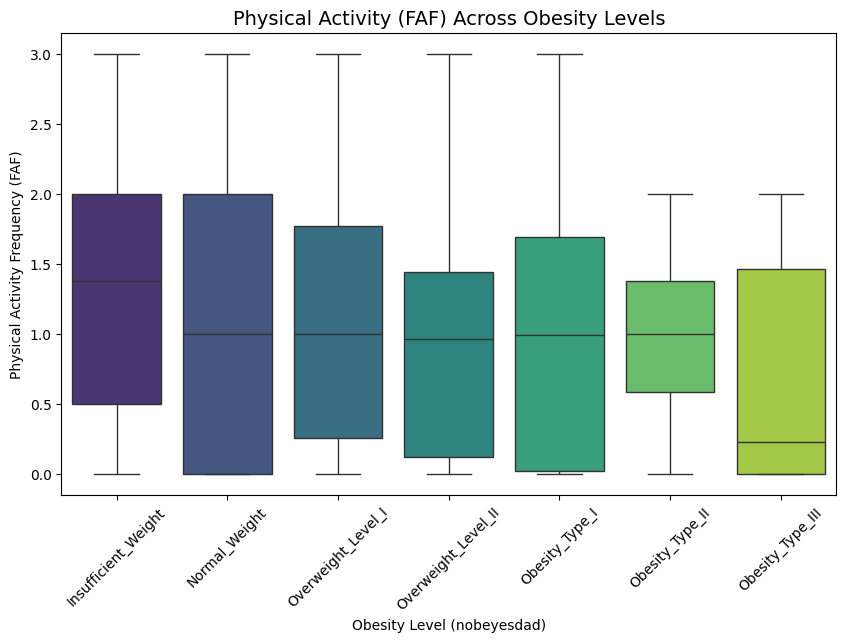

In [219]:
plt.figure(figsize=(10,6))
sns.boxplot(x='nobeyesdad', y='faf', data=df, hue='nobeyesdad', palette='viridis', legend=False)
plt.title("Physical Activity (FAF) Across Obesity Levels", fontsize=14)
plt.xlabel("Obesity Level (nobeyesdad)")
plt.ylabel("Physical Activity Frequency (FAF)")
plt.xticks(rotation=45)
plt.show()


### Findings and Interpretation




From the summary and visualization:
- People with **normal or insufficient weight** tend to engage in physical activity more frequently.  
- As obesity level increases, the **median and overall spread** of physical activity frequency decreases.
- The weak negative correlation (-0.187) suggests that while higher activity levels are slightly associated with lower weight, **other factors** likely play a more significant role in determining body weight.




### Summary




Given our dataset, we found that individuals with higher obesity levels tend to have **lower physical activity frequency**, but the effect is **not very strong** statistically.  

This suggests that while physical activity contributes to healthier weight management, it might not be enough alone to completely influence obesity outcome.

## **EDA Q3: Does age influence obesity levels?**
In this part of our analysis, we explored the relationship between **Age** (`age`) and **Obesity Level** (`nobeyesdad`).  

Our goal was to determine whether **age plays a significant role** in the development of obesity — that is, if older individuals are more likely to belong to higher obesity categories.

#### Measures of Central Tendency and Correlation


In [220]:
# Summary statistics of age across obesity categories
age_summary = df.groupby('nobeyesdad', observed=True)['age'].describe().round(2)
display(age_summary)

# Correlation between age and BMI
age_bmi_corr = df['age'].corr(df['nobeyesdad_encoded'], method='spearman')
print(f"Correlation between Age and Obesity Level: {age_bmi_corr:.3f}")

,count,mean,std,min,25%,50%,75%,max
nobeyesdad,,,,,,,,
Insufficient_Weight,267.0,19.76,2.59,16.0,18.00,19.21,21.01,35.13
Normal_Weight,282.0,21.57,4.20,14.0,19.00,21.00,23.00,35.13
Overweight_Level_I,276.0,23.21,5.37,16.0,19.50,21.31,26.00,35.13
Overweight_Level_II,290.0,26.08,6.13,17.0,21.00,24.00,33.00,35.13
Obesity_Type_I,351.0,24.99,6.10,15.0,20.88,22.98,29.78,35.13
Obesity_Type_II,297.0,27.85,4.07,20.0,24.58,27.19,30.72,35.13
Obesity_Type_III,324.0,23.50,2.76,18.0,21.02,25.37,26.00,26.00


Correlation between Age and Obesity Level: 0.404


**Central Tendency**
- We computed the **mean**, **median**, and **standard deviation** of `age` for each obesity category.
This helps us identify whether older individuals are more likely to fall into higher obesity classes.

- From the summary statistics, we observed that:

    - Insufficient Weight individuals had the lowest average age (≈19.8 years).

    - **Normal Weight** and **Overweight Level I–II** categories showed a gradual increase in mean age, reaching around 26 years for Overweight Level II.

    - **Obesity Type II** had the highest mean age (≈27.9 years), indicating that obesity tends to be more prevalent among older individuals.

    - However, **Obesity Type III** showed a slightly lower mean age (≈23.5 years), which may suggest differences in lifestyle or metabolic factors among younger obese individuals.

**Correlation Analysis**
- We computed the Pearson correlation coefficient between **age** and **obesity level**, which resulted in **r = 0.404**.
- This shows a moderate positive correlation — as **age increases, one is more prone to becoming more obese**.
- In other words, older individuals are generally more likely to have higher obesity levels.


#### Visualization
- We visualized this relationship using a **boxplot**, which displays the distribution of **age** within each **obesity** category.
- The plot clearly shows an upward shift in the median age from Insufficient Weight to Obesity Type II, indicating a general trend of increasing age with higher obesity levels.
- This visual pattern supports the numerical summary and reinforces the positive relationship between **age** and **obesity**.

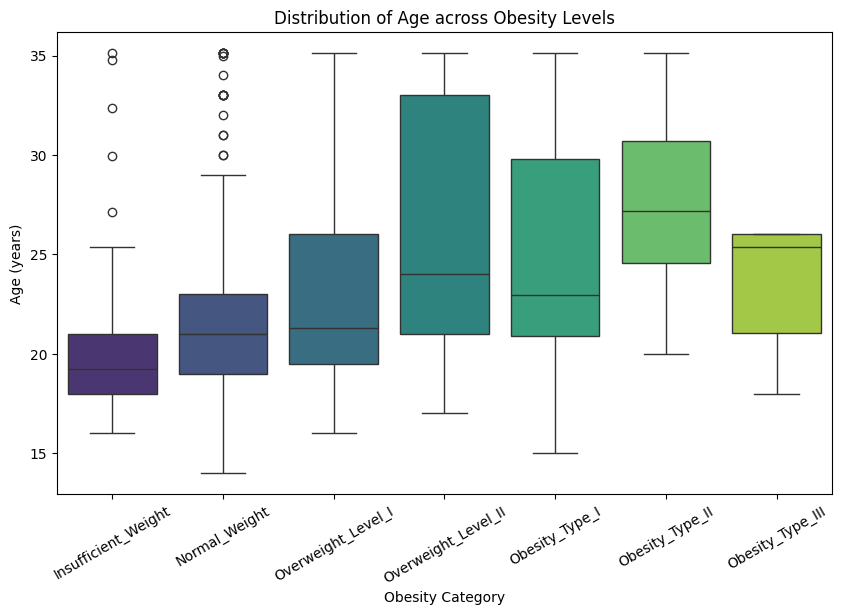

In [221]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='nobeyesdad', y='age', hue='nobeyesdad', palette='viridis', legend=False)
plt.title('Distribution of Age across Obesity Levels')
plt.xlabel('Obesity Category')
plt.ylabel('Age (years)')
plt.xticks(rotation=30)
plt.show()

### Findings and Interpretation

From the summary and visualization:
- Individuals with **insufficient or normal weight** tend to be **younger** on average.
- As the **obesity level increases**, the **median age** and **overall spread** of ages generally increase — indicating that older individuals are more likely to fall into higher obesity categories.
- The **moderate positive correlation (r = 0.404)** between **age** and **obesity level** suggests that **age contributes to higher body weight**, possibly due to metabolic slowdown, lifestyle habits, or cumulative effects of diet over time.
- However, the pattern is **not strictly linear**, as seen in Obesity Type III, where the mean age slightly decreases — implying that severe obesity can also occur among younger individuals.

#### Summary

- Our findings indicate that **age is moderately associated with obesity** — older individuals tend to be at higher obesity levels.
- However, since the correlation is not strong, **age alone does not fully explain obesity development**.
- This suggests that while aging may increase the likelihood of weight gain, **other lifestyle and behavioral factors** (such as diet, activity, or family history) also play crucial roles in influencing obesity outcomes.


## **EDA Q4: Do people who monitor their calorie intake (SCC) tend to have lower weight or obesity levels?**

In this part of our analysis, we explored the relationship between **calorie monitoring habits** (`SCC_BIN`) and **obesity level** (`nobeyesdad`).  

Our goal was to determine whether individuals who monitor their calorie intake tend to maintain a healthier body weight classification.


### Procedure




**Data Preparation**  
   - We used the binary variable `SCC_BIN`, which indicates whether a person monitors their calorie intake (`1` for Yes, `0` for No`).
   - The variable `nobeyesdad` classifies individuals into categories ranging from *Insufficient Weight* to *Obesity Type III*.

### Measure of Central Tendency

In [222]:
# Summary statistics of calorie monitoring across obesity levels
scc_summary = df.groupby('nobeyesdad', observed=True)['scc_bin'].describe().round(2)
display(scc_summary)

# Correlation between calorie monitoring and weight
scc_nobeyesdad_corr = df['scc_bin'].corr(df['nobeyesdad_encoded'], method='spearman')
print(f"Correlation between Calorie Monitoring (scc_bin) and Obesity Level (nobeyesdad): {scc_nobeyesdad_corr:.3f}")

,count,mean,std,min,25%,50%,75%,max
nobeyesdad,,,,,,,,
Insufficient_Weight,267.0,0.08,0.28,0.0,0.0,0.0,0.0,1.0
Normal_Weight,282.0,0.11,0.31,0.0,0.0,0.0,0.0,1.0
Overweight_Level_I,276.0,0.13,0.34,0.0,0.0,0.0,0.0,1.0
Overweight_Level_II,290.0,0.01,0.12,0.0,0.0,0.0,0.0,1.0
Obesity_Type_I,351.0,0.01,0.08,0.0,0.0,0.0,0.0,1.0
Obesity_Type_II,297.0,0.0,0.06,0.0,0.0,0.0,0.0,1.0
Obesity_Type_III,324.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Correlation between Calorie Monitoring (scc_bin) and Obesity Level (nobeyesdad): -0.198


**Measures of Central Tendency**  
   - Since `SCC_BIN` is binary, we used the **mean** as a representation of the proportion of people who monitor their calories.  
   - We grouped the dataset by `nobeyesdad` and calculated the mean of `SCC_BIN` to determine the proportion within each obesity category.

   The summary table shows:
   - *Overweight Level I* had the **highest proportion** of calorie monitoring (mean ≈ 0.13).  
   - *Obesity Type II* and *Obesity Type III* had **very low proportions** (mean ≈ 0.00).  
   - *Normal Weight* and *Insufficient Weight* groups had moderate calorie monitoring rates (around 0.08–0.11).

**Correlation Analysis**  
   - We computed the **Spearman correlation** between `SCC_BIN` and `nobeyesdad`.  
   - The correlation result was **-0.198**, showing a **weak negative relationship** between calorie monitoring and weight.

   This means that people who track their calorie intake tend to have slightly lower weights.

### Visualization

   - To better understand the relationship, we created a **bar chart** showing the proportion of calorie monitoring across obesity levels.

/tmp/ipython-input-318075864.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='nobeyesdad', y='scc_bin', data=df, ci=None, palette='crest')
/tmp/ipython-input-318075864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nobeyesdad', y='scc_bin', data=df, ci=None, palette='crest')


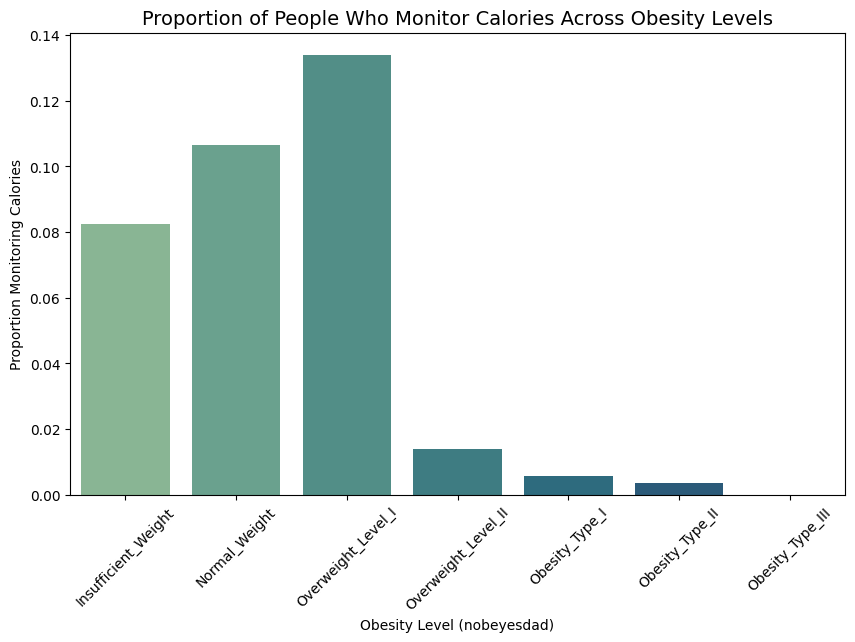

In [223]:
plt.figure(figsize=(10,6))
sns.barplot(x='nobeyesdad', y='scc_bin', data=df, ci=None, palette='crest')
plt.title("Proportion of People Who Monitor Calories Across Obesity Levels", fontsize=14)
plt.xlabel("Obesity Level (nobeyesdad)")
plt.ylabel("Proportion Monitoring Calories")
plt.xticks(rotation=45)
plt.show()



### Findings and Interpretation




From the results, we observed that:
- Individuals in *Overweight Level I* and *Normal Weight* categories are **more likely to monitor their calorie intake**.
- The frequency of calorie monitoring drops significantly among those in *Obesity Type II* and *III*.

This suggests an **inverse relationship** between calorie monitoring and obesity:  
as obesity level increases, the tendency to track calorie intake decreases.




### Summary




Given our dataset, our findings suggest that calorie monitoring behavior is **linked to lower obesity levels**, though not as strong as expected.  
This means that while calorie tracking contributes to healthier weight management, it likely works alongside other factors.

# **Research Question**
## *Which behavioral and lifestyle factors are most strongly associated with higher obesity levels among individuals?*



## Connection to Exploratory Data Analysis (EDA)

From our exploratory data analysis, several variables showed varying levels of association with obesity. Factors such as **physical activity frequency (FAF)** and **calorie monitoring (SCC)** displayed clear trends when compared with obesity indicators.  

Specifically, individuals with **lower physical activity** and those who **do not monitor their calorie intake** generally exhibited **higher obesity levels**. These findings suggest that obesity is influenced by a **combination of behavioral, lifestyle, and hereditary factors** rather than a single cause.


## Importance of the Research Question

Determining which behavioral and lifestyle factors most strongly correlate with obesity allows us to **pinpoint the primary contributors** to weight gain.  

This understanding is valuable for **researchers**, who can focus future studies on the most significant predictors, and for the **community**, as it guides the creation of **targeted health programs** and **preventive interventions** to combat obesity.